In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## Loading csv data into pandas dataframe

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
# Fetch top 5 rows in the dataframe

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# info() prints information about the dataframe

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# Displaying the number of entries in the dataframe

len(loan_df.index)

39717

In [6]:
# Displaying the number of rows and columns in the dataframe

loan_df.shape

(39717, 111)

## Data cleaning

### Drop all the columns which are having more than 50% of null values

In [7]:
loan_df.dropna(axis = 'columns', thresh = len(loan_df.index)/2, inplace = True)

In [8]:
loan_df.shape

(39717, 54)

Number of columns for analysis came down from 111 to 54

In [9]:
# Check if there are any duplicates rows with same id or member_id in given data

print('Number of duplicate rows = {}'.format(loan_df.duplicated(subset=['id', 'member_id'], keep='last').sum()))

Number of duplicate rows = 0


In [10]:
# Fetch all the columns which has null entries

null_columns = loan_df.columns[loan_df.isnull().any()]
print('Following columns has some entries as NULL {}'.format(null_columns))

Following columns has some entries as NULL Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


#### Out of the following columns following can be removed as they are just description and will not add any value to our analysis

emp_title: The job title supplied by the Borrower when applying for the loan. \
desc: Loan description provided by the borrower. \
title: The loan title provided by the borrower.


In [11]:
# Dropping columns emp_title, desc, title

loan_df.drop(['emp_title', 'desc', 'title'], axis = 1, inplace = True)

In [12]:
loan_df.shape

(39717, 51)

Number of columns for analysis came down from 111 to 51

#### We can drop all the columns which can take only one unique value as they may not add any value to our analysis

In [13]:
columns_with_one_unique_value = []
for col in loan_df.columns:
    # Do not consider nan in unique values
    if (len(loan_df[col].dropna().unique()) == 1):
        columns_with_one_unique_value.append(col)
print(columns_with_one_unique_value)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [14]:
loan_df.drop(columns_with_one_unique_value, axis = 1, inplace = True)

In [15]:
loan_df.shape

(39717, 42)

Number of columns for analysis came down from 111 to 42

In [16]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [17]:
# Check no; of null values per each column

loan_df.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_py

In [18]:
# Since there are very few rows with null values when compared with size of dataset, we can safely drop these rows.

loan_df.dropna(axis = 'index', how = 'any', inplace = True)

In [19]:
# Verify whether all rows with null entries are removed or not.

loan_df.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

In [20]:
# Fetch one entry so that we can apply further cleaning on data based on value types

loan_df.iloc[1]

id                                                                   1077430
member_id                                                            1314167
loan_amnt                                                               2500
funded_amnt                                                             2500
funded_amnt_inv                                                       2500.0
term                                                               60 months
int_rate                                                              15.27%
installment                                                            59.83
grade                                                                      C
sub_grade                                                                 C4
emp_length                                                          < 1 year
home_ownership                                                          RENT
annual_inc                                                           30000.0

In [21]:
loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [22]:
# Cleaning up the values for term and converting it to int type

loan_df['term'] = loan_df['term'].apply(lambda x: int(x.split(' ')[1]))
loan_df.rename(columns={"term": "term (months)"}, inplace = True)

In [23]:
# Cleaning up the values for int_rate, revol_util and converting it to float type
def clean_percent_string (percent_string):
    return float(percent_string.replace('%',''))
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: clean_percent_string(x))
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: clean_percent_string(x))
loan_df.rename(columns={"int_rate": "int_rate (in %)"}, inplace = True)
loan_df.rename(columns={"revol_util": "revol_util (in %)"}, inplace = True)

In [24]:
# url column data may not add any value for the analysis as url is just a concatenation of 
# https://lendingclub.com/browse/loanDetail.action? and loan_id. Hence dropping that column

loan_df.drop(['url'], axis = 1, inplace = True)

In [25]:
len(loan_df['id'].unique())

37835

In [26]:
len(loan_df['member_id'].unique())

37835

In [27]:
# Since id and member_id both are unique for each entry, we can drop any of these column.
# Hence dropping member_id column

loan_df.drop(['member_id'], axis = 1, inplace = True)

In [28]:
# Change types of following ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] columns to datetime

def change_columns_type_to_datetime (dataframe, list_of_columns):
    for column in list_of_columns:
        dataframe[column] = pd.to_datetime(dataframe[column].str.upper(), format='%b-%y')
change_columns_type_to_datetime (loan_df, ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

In [29]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37835 entries, 0 to 39680
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37835 non-null  int64         
 1   loan_amnt                37835 non-null  int64         
 2   funded_amnt              37835 non-null  int64         
 3   funded_amnt_inv          37835 non-null  float64       
 4   term (months)            37835 non-null  int64         
 5   int_rate (in %)          37835 non-null  float64       
 6   installment              37835 non-null  float64       
 7   grade                    37835 non-null  object        
 8   sub_grade                37835 non-null  object        
 9   emp_length               37835 non-null  object        
 10  home_ownership           37835 non-null  object        
 11  annual_inc               37835 non-null  float64       
 12  verification_status      37835 n

Remove customer 

### Univarient analysis on Catogorical variables

<AxesSubplot:>

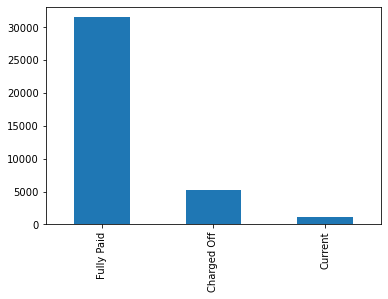

In [30]:
loan_df['loan_status'].value_counts().plot.bar()

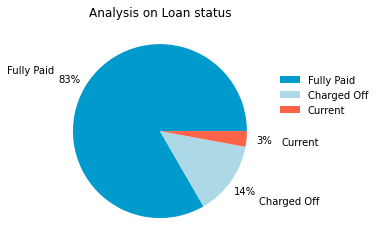

In [31]:
fig, ax = plt.subplots()
color_palette_list = ['#009ACD', '#ADD8E6', '#FF6347']
labels = loan_df['loan_status'].unique()
percentages = loan_df['loan_status'].value_counts()
ax.pie(percentages, labels=labels,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.set_title("Analysis on Loan status")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

#### Observations:
1. Maximum number of loans are fully paid
2. 84% of loans are fully paid. 14% of loans applicants has not paid the instalments in due time for a long period of    time and 3% of loans installment are still in progress. 

<AxesSubplot:>

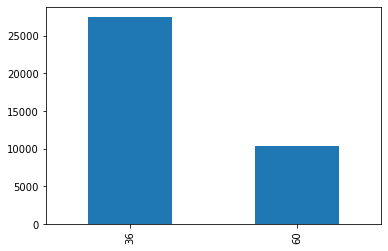

In [32]:
loan_df['term (months)'].value_counts().plot.bar()

#### Observation: 
1. Maximum number of loans have term of 36 months

<AxesSubplot:>

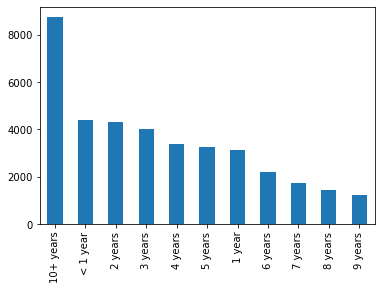

In [33]:
loan_df['emp_length'].value_counts().plot.bar()

#### Observation:
1. Ignoring the first catogory (10+ years as its a cummulative for all people above 10 years) we can easily notice the treand that loans are taken by the people in their beginning of their career in general, as they might have less income at this stage.

<AxesSubplot:>

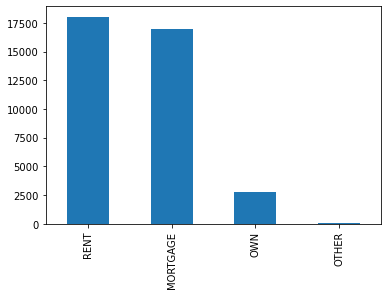

In [34]:
loan_df['home_ownership'].value_counts().plot.bar()

#### Observation:
1. People who doesn't have own house are taking loans. People having own houses might not take loan immediately, instead they might think of mortgaging their house or selling it in case of urgency.

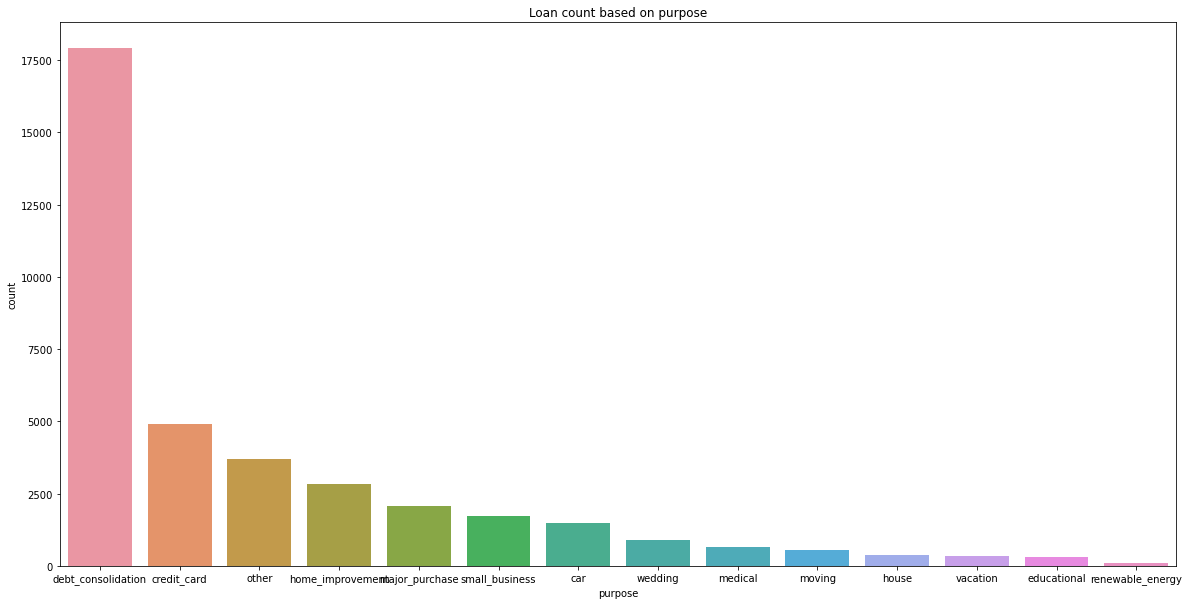

In [35]:
plt.figure(figsize=(20,10))
plt.title('Loan count based on purpose')
sb.countplot(x=loan_df['purpose'], order=loan_df['purpose'].value_counts(ascending=False).index)
plt.show()

#### Observation:
1. People taking loans are mostly for debt consolidation.

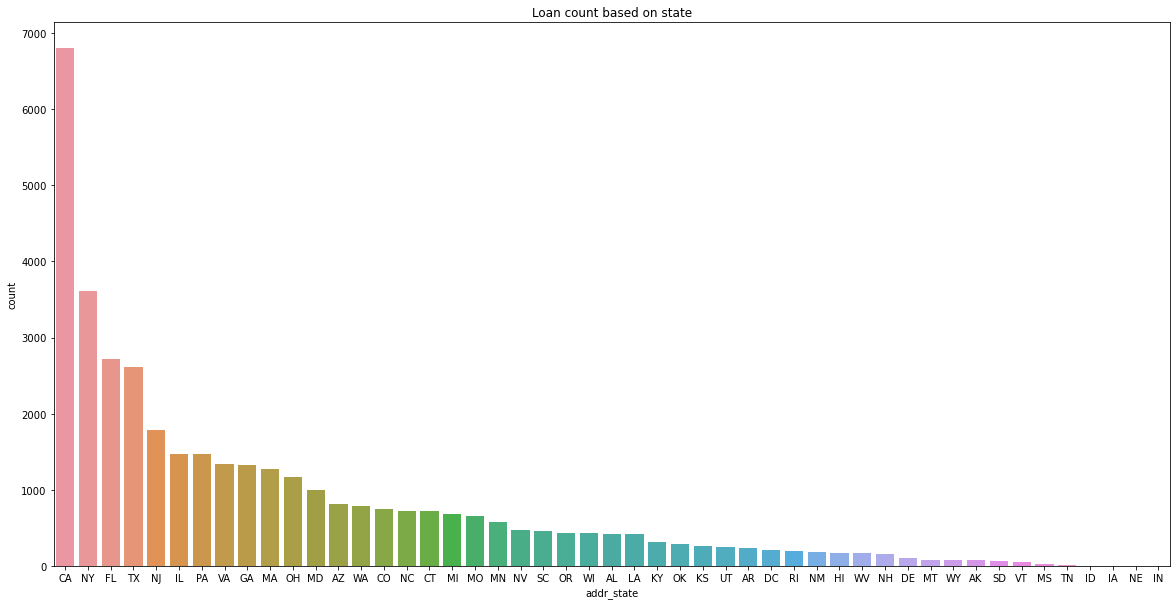

In [36]:
plt.figure(figsize=(20,10))
plt.title('Loan count based on state')
sb.countplot(x=loan_df['addr_state'], order=loan_df['addr_state'].value_counts(ascending=False).index)
plt.show()

#### Observation
1. People in CA, NY, FL, TX are taking more loans when compared to other states. Common thing among these states is
they are coastal regions. In general cost of living in coastal regions is hight which might be a reason for more people opting for loans from this region.

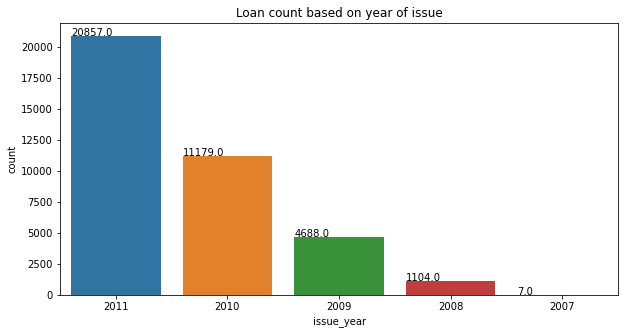

In [37]:
# derived variable issue_year from issue_date. This might give us some significance impact on which year more
# loans are issued

loan_df['issue_year'] = loan_df['issue_d'].dt.year

plt.figure(figsize=(10,5))
plt.title('Loan count based on year of issue')
ax = sb.countplot(x=loan_df['issue_year'], order=loan_df['issue_year'].value_counts(ascending=False).index)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

#### Observation:
1. We can clealy observe that the number of loans issues are almost doubling each year.

### Univarient analysis on continuous variable


In [38]:
# For now, considering all columns which are not of type object and datetime as continuos columns. From the result
# another round of filtering is added based on domain knowledge and unique values that columns take.

numerical_columns = []
for i in loan_df.columns:
    if loan_df[i].dtype!="object" and loan_df[i].dtype!="datetime64[ns]":
        numerical_columns.append(i)
print(numerical_columns, '\n') 

# From the above list we can exclude id, term (months), issue_year, delinq_2yrs, pub_rec_bankruptcies, pub_rec,
# inq_last_6mths as they are not continuos. [Verified by printing unique values of these columns]

numerical_columns = list(set(numerical_columns) - set(['id', 'term (months)', 'issue_year', 'delinq_2yrs',
                                                      'pub_rec_bankruptcies', 'pub_rec', 'inq_last_6mths']))
# Further filtered numerical columns
print(numerical_columns)


['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term (months)', 'int_rate (in %)', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util (in %)', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'issue_year'] 

['out_prncp_inv', 'total_pymnt', 'revol_bal', 'loan_amnt', 'collection_recovery_fee', 'dti', 'total_rec_int', 'int_rate (in %)', 'total_rec_prncp', 'revol_util (in %)', 'out_prncp', 'installment', 'total_rec_late_fee', 'total_pymnt_inv', 'annual_inc', 'total_acc', 'funded_amnt_inv', 'open_acc', 'funded_amnt', 'recoveries', 'last_pymnt_amnt']


In [39]:
# Outlier detection and removal using Z score

# z-score is calculated for every value with respect to their columns
z = np.abs(stats.zscore(loan_df[numerical_columns]))

# Add loan_status to this segmented dataframe as this column might be useful for us later for analysis on loan_status
numerical_columns.append('loan_status')

# Removal of all rows which contain outliers
loan_num_df = loan_df[numerical_columns][(z < 3).all(axis=1)]

In [40]:
loan_num_df.head()

,out_prncp_inv,total_pymnt,revol_bal,loan_amnt,collection_recovery_fee,dti,total_rec_int,int_rate (in %),total_rec_prncp,revol_util (in %),...,total_rec_late_fee,total_pymnt_inv,annual_inc,total_acc,funded_amnt_inv,open_acc,funded_amnt,recoveries,last_pymnt_amnt,loan_status
0,0.00,5863.155187,13648,5000,0.00,27.65,863.16,10.65,5000.00,83.7,...,0.00,5833.84,24000.0,9,4975.0,3,5000,0.00,171.62,Fully Paid
1,0.00,1008.710000,1687,2500,1.11,1.00,435.17,15.27,456.46,9.4,...,0.00,1008.71,30000.0,4,2500.0,3,2500,117.08,119.66,Charged Off
2,0.00,3005.666844,2956,2400,0.00,8.72,605.67,15.96,2400.00,98.5,...,0.00,3005.67,12252.0,10,2400.0,2,2400,0.00,649.91,Fully Paid
3,0.00,12231.890000,5598,10000,0.00,20.00,2214.92,13.49,10000.00,21.0,...,16.97,12231.89,49200.0,37,10000.0,10,10000,0.00,357.48,Fully Paid
4,524.06,3513.330000,27783,3000,0.00,17.94,1037.39,12.69,2475.94,53.9,...,0.00,3513.33,80000.0,38,3000.0,15,3000,0.00,67.79,Current


array([[<AxesSubplot:title={'center':'out_prncp_inv'}>,
        <AxesSubplot:title={'center':'total_pymnt'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'collection_recovery_fee'}>],
       [<AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'total_rec_int'}>,
        <AxesSubplot:title={'center':'int_rate (in %)'}>,
        <AxesSubplot:title={'center':'total_rec_prncp'}>,
        <AxesSubplot:title={'center':'revol_util (in %)'}>],
       [<AxesSubplot:title={'center':'out_prncp'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'total_rec_late_fee'}>,
        <AxesSubplot:title={'center':'total_pymnt_inv'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'open_acc'}>,


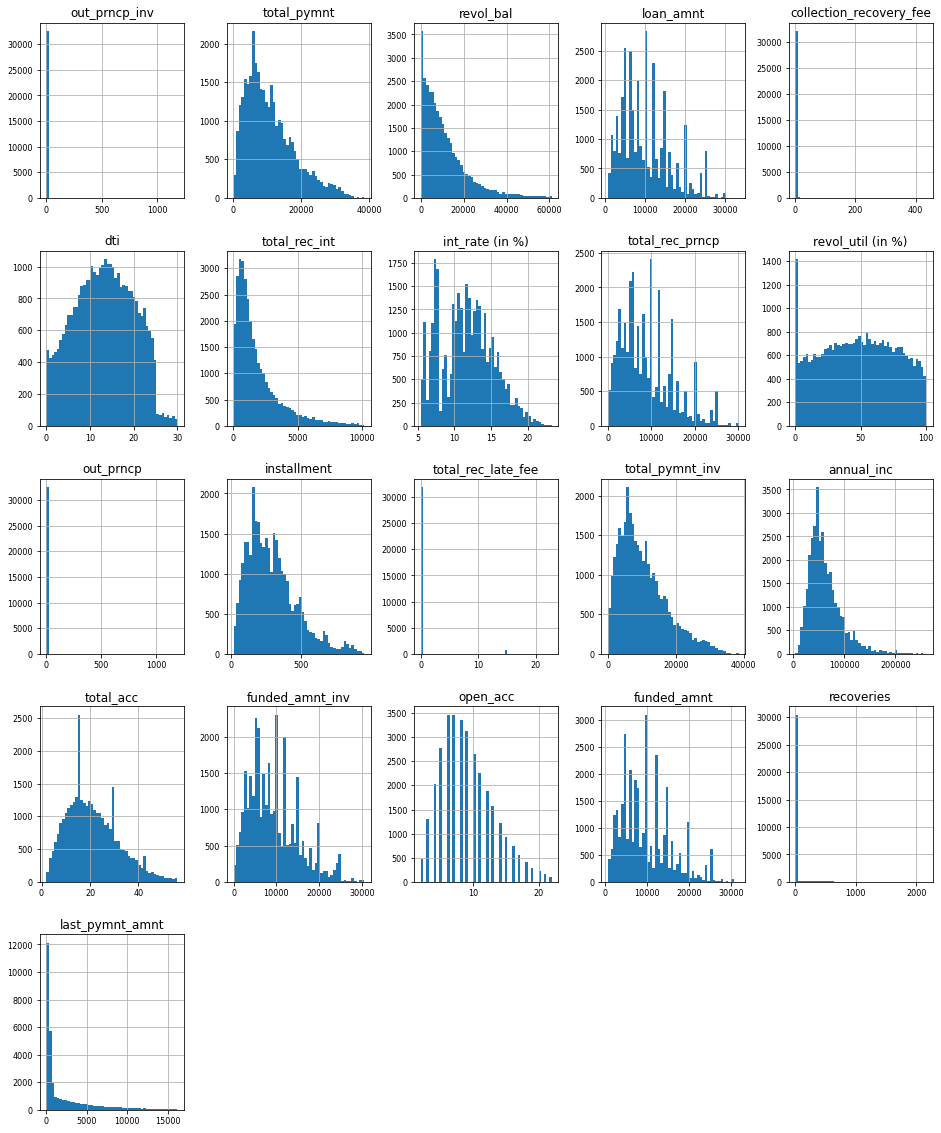

In [41]:
loan_num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Observations:

From the above graph, we can observe that particular range of annual_inc, loan_amnt, revol_bal and total_acc has a significant impact of number of loan applicants. Lets try to anylise these columns by converting this continuous attributes into catogorical attrubutes.

##### Lets convert few of these continuos attributes to catogorical attributes for further analysis

In [42]:
# To analyse the loan count on income, let us check the distribution of incomes among the applicants

loan_num_df['annual_inc'].describe()

count     32990.000000
mean      62908.370419
std       33217.388943
min        4000.000000
25%       40000.000000
50%       55496.500000
75%       78000.000000
max      260000.000000
Name: annual_inc, dtype: float64

In [43]:
# Crate different bins to catogorise annual incomes into different bins

loan_num_df["annual_inc_bins"] = pd.cut(loan_num_df['annual_inc'], np.linspace(0, 260000, 14))

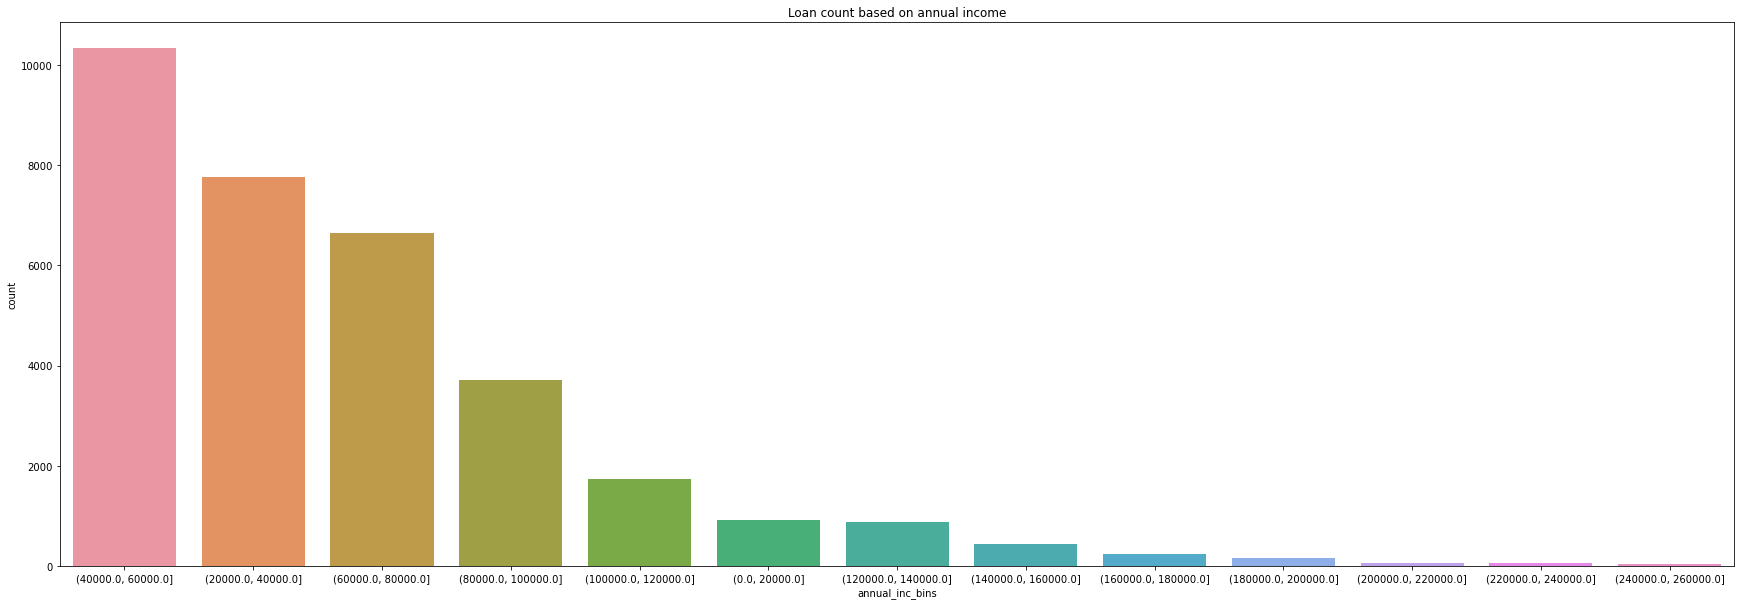

In [44]:
plt.figure(figsize=(30,10))
plt.title('Loan count based on annual income')
sb.countplot(x=loan_num_df['annual_inc_bins'], order=loan_num_df['annual_inc_bins'].value_counts(ascending=False).index)
plt.show()

### Observation
1. Individuals having annual income ranging between 4 lakhs to 6 lakhs are taking more loans

In [45]:
# To analyse the loan count on loan amount, let us check the distribution of loan amounts among the applicants

loan_num_df['loan_amnt'].describe()

count    32990.000000
mean     10003.357078
std       6051.052312
min        725.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      33425.000000
Name: loan_amnt, dtype: float64

In [46]:
# Crate different bins to catogorise loan amounts into different bins

loan_num_df["loan_amnt_bins"] = pd.cut(loan_num_df['loan_amnt'], np.linspace(725, 33425, 16))

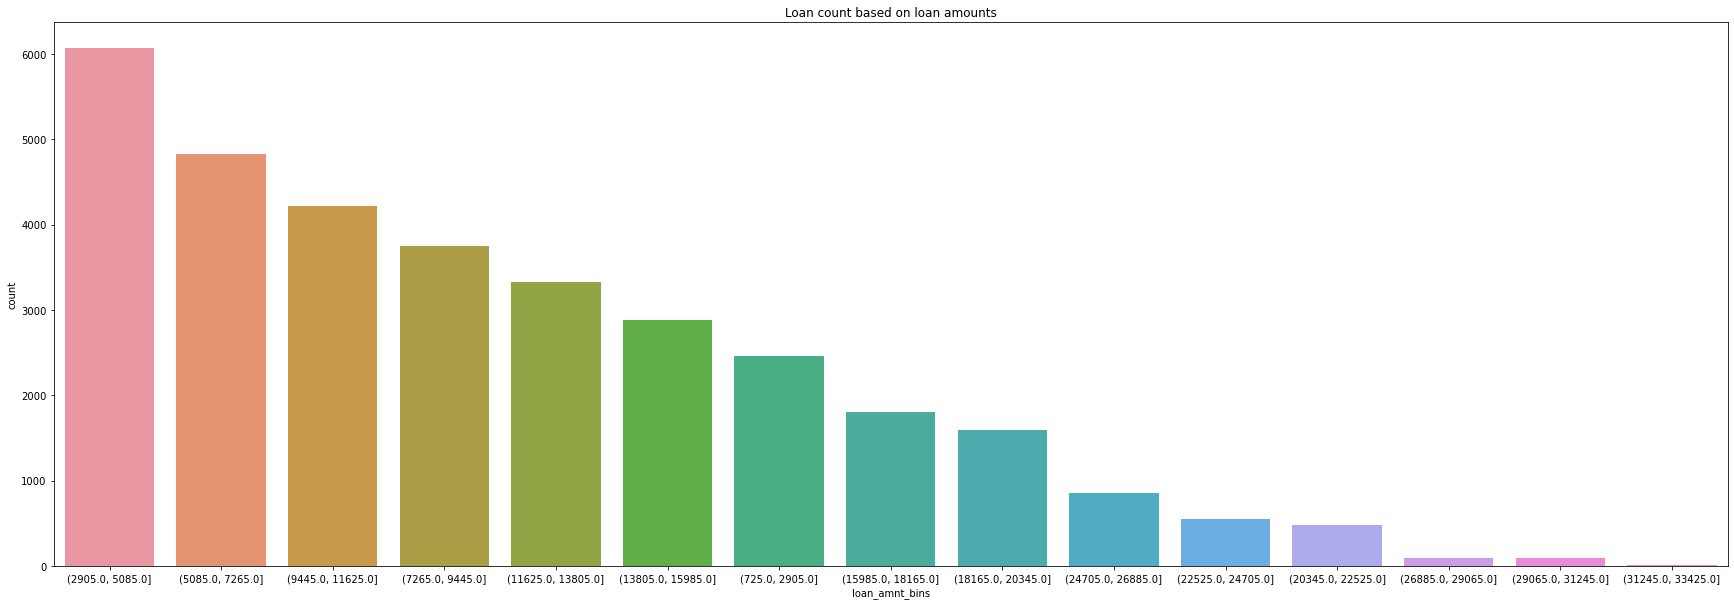

In [47]:
plt.figure(figsize=(30,10))
plt.title('Loan count based on loan amounts')
sb.countplot(x=loan_num_df['loan_amnt_bins'], order=loan_num_df['loan_amnt_bins'].value_counts(ascending=False).index)
plt.show()

### Observation
1. Loans amounts taken are maximum in the range 3000 to 5000

In [48]:
# To analyse the loan count on total_acc, let us check the distribution of total_acc among the applicants

loan_num_df['total_acc'].describe()

count    32990.000000
mean        21.146014
std         10.511032
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         56.000000
Name: total_acc, dtype: float64

In [49]:
# Crate different bins to catogorise total_acc into different bins

loan_num_df["total_acc_bins"] = pd.cut(loan_num_df['total_acc'], np.linspace(2, 56, 7))

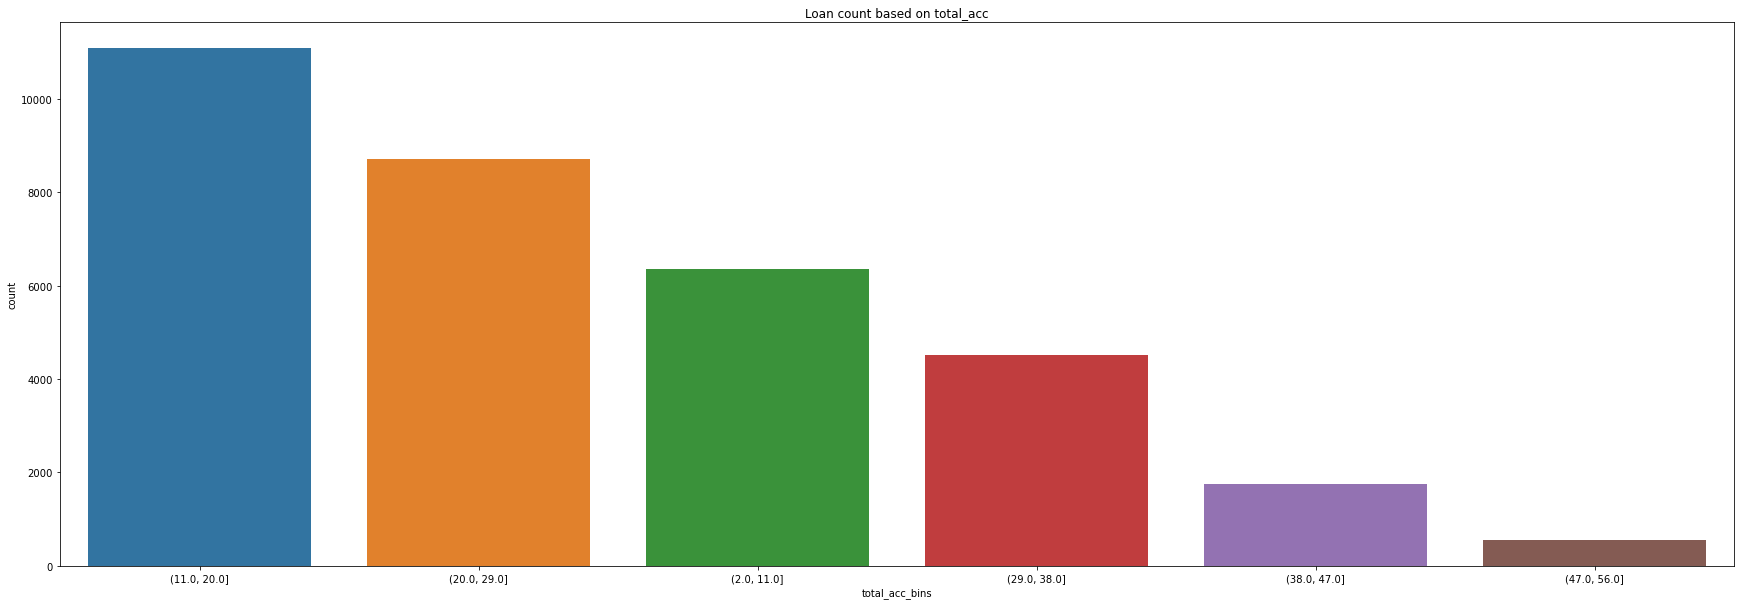

In [50]:
plt.figure(figsize=(30,10))
plt.title('Loan count based on total_acc')
sb.countplot(x=loan_num_df['total_acc_bins'], order=loan_num_df['total_acc_bins'].value_counts(ascending=False).index)
plt.show()

### Observation
1. Maximum Loans are taken by the individuals having total_acc 11 to 20

### Segmented univarient analysis

<AxesSubplot:xlabel='loan_status'>

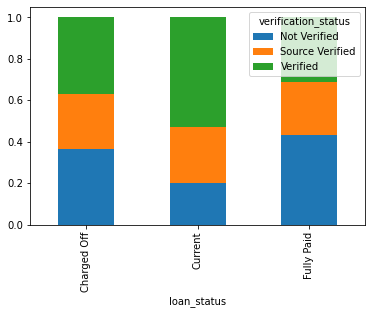

In [51]:
# Cross tabulation between Loan Status and Verfication Status

pd.crosstab(index=loan_df['loan_status'],columns=loan_df['verification_status'], normalize = "index").plot.bar(stacked = True)

#### Observation
1. For verification_status, distribution is same for applicants who are charged_off and fully_paid. So we can conclude that verification_status doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

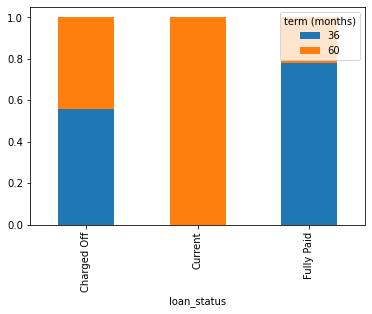

In [52]:
# Cross tabulation between Loan Status and term (months)

pd.crosstab(index=loan_df['loan_status'],columns=loan_df['term (months)'], normalize = "index").plot.bar(stacked = True)

#### Observation
1. Number of applicants who are 'charged off' (defaulted) took loan for term of 36 months are higher than applicants took loan for 60 months. One reason could be people in general want to opt for less number of months so that interest they pay would be less but taking loan for small terms may increase the burden on monthly net income after deductions which may lead to defaults

<AxesSubplot:xlabel='loan_status'>

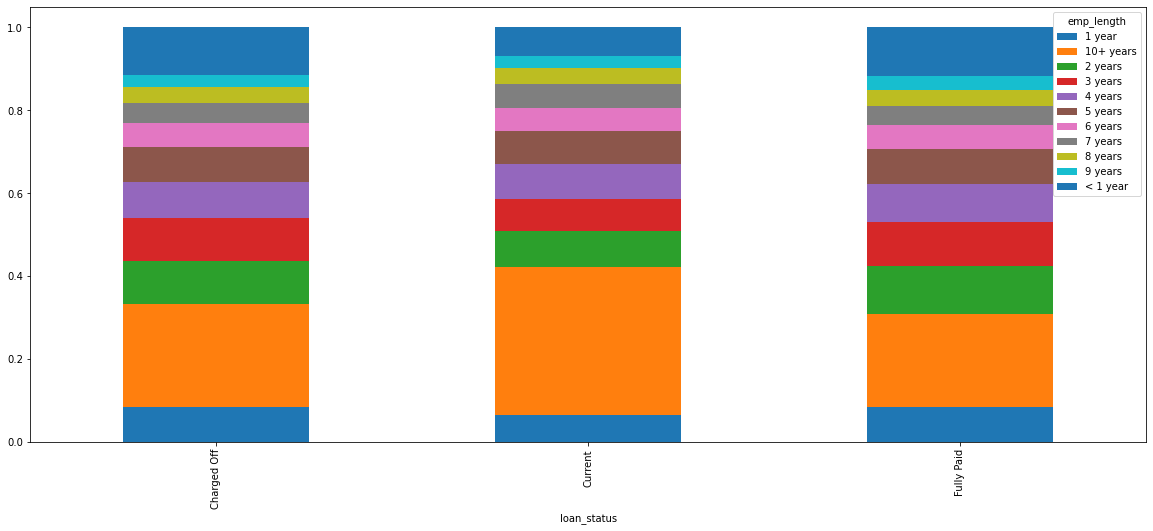

In [53]:
# Cross tabulation between Loan Status and emp_length

pd.crosstab(index=loan_df['loan_status'],columns=loan_df['emp_length'], normalize="index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation

1. Ignoring loan_status as current bar, almost distribution is same for applicants who are charged_off and fully_paid. So we can conclude that emp_length doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

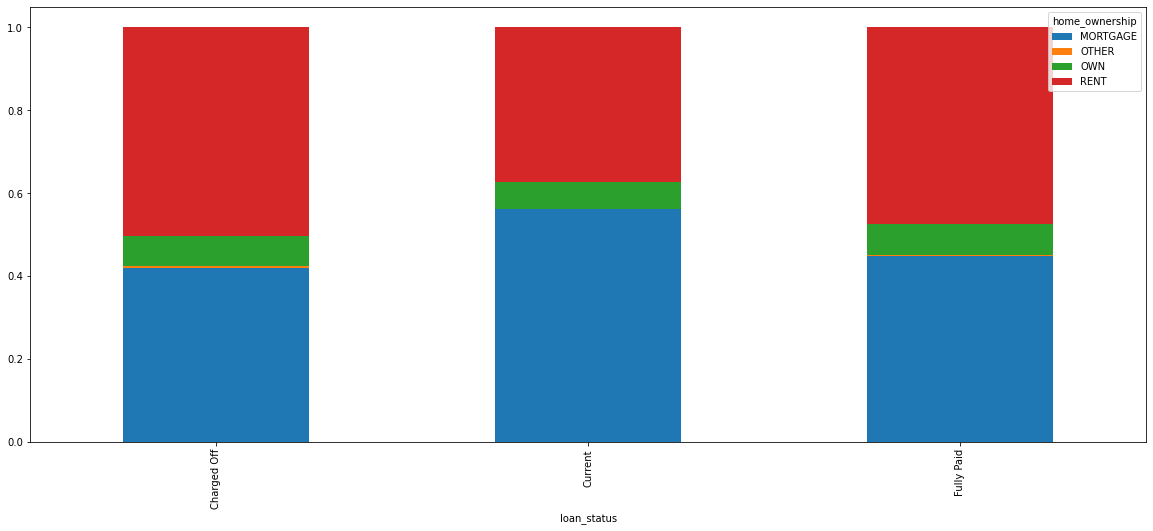

In [54]:
# Cross tabulation between Loan Status and home_ownership

pd.crosstab(index=loan_df['loan_status'],columns=loan_df['home_ownership'], normalize="index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation
1. Similarly, even for home_ownership, distribution is same for applicants who are charged_off and fully_paid. So we can conclude that home_ownership alone doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

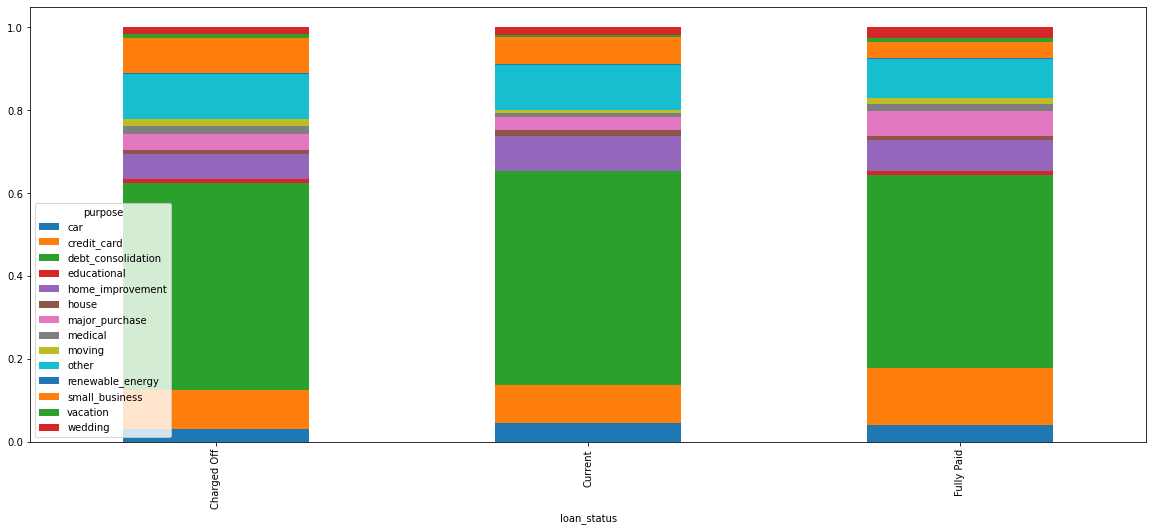

In [55]:
# Cross tabulation between Loan Status and purpose

pd.crosstab(index=loan_df['loan_status'],columns=loan_df['purpose'], normalize = "index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation
1. Similarly, even for purpose, distribution is same for applicants who are charged_off and fully_paid. So we can conclude that purpose alone doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

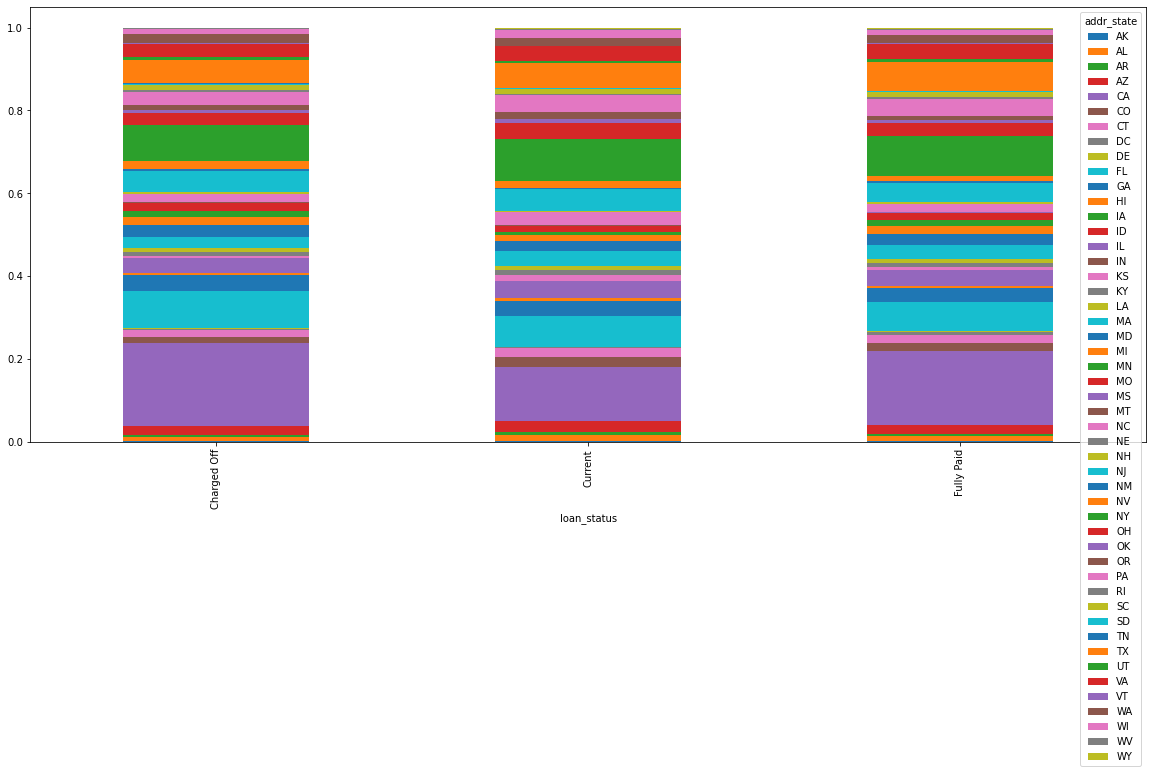

In [56]:
# Cross tabulation between Loan Status and addr_state

pd.crosstab(index=loan_df['loan_status'],columns=loan_df['addr_state'], normalize = "index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation
1. Similarly, even for addr_state, distribution is same for applicants who are charged_off and fully_paid. So we can conclude that addr_state alone doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

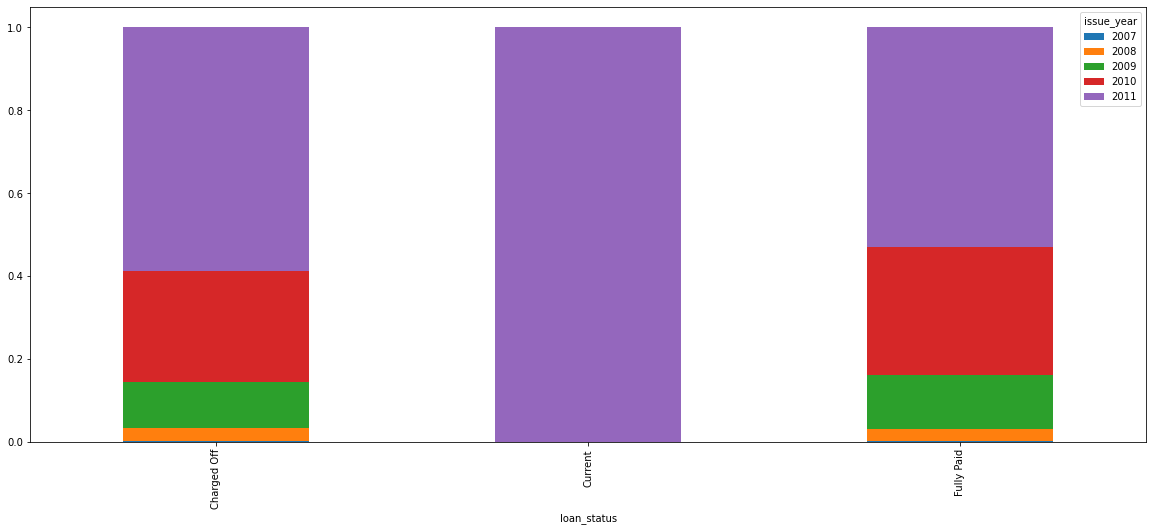

In [57]:
# Cross tabulation between Loan Status and issue_year

pd.crosstab(index=loan_df['loan_status'],columns=loan_df['issue_year'], normalize = "index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation
1. Similarly, even for issue_year, distribution is almost same for applicants who are charged_off and fully_paid. So we can conclude that issue_year alone doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

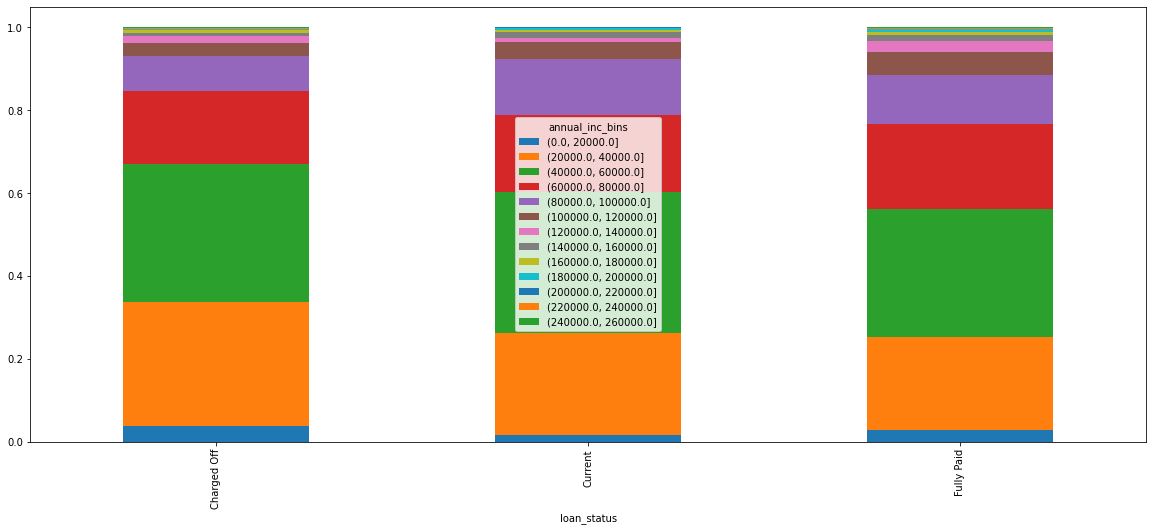

In [90]:
# Cross tabulation between Loan Status and annual_inc_bins

pd.crosstab(index=loan_num_df['loan_status'],columns=loan_num_df['annual_inc_bins'], normalize = "index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation
1. Similarly, even for annual income, distribution is almost same for applicants who are charged_off and fully_paid. So we can conclude that annual income alone doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

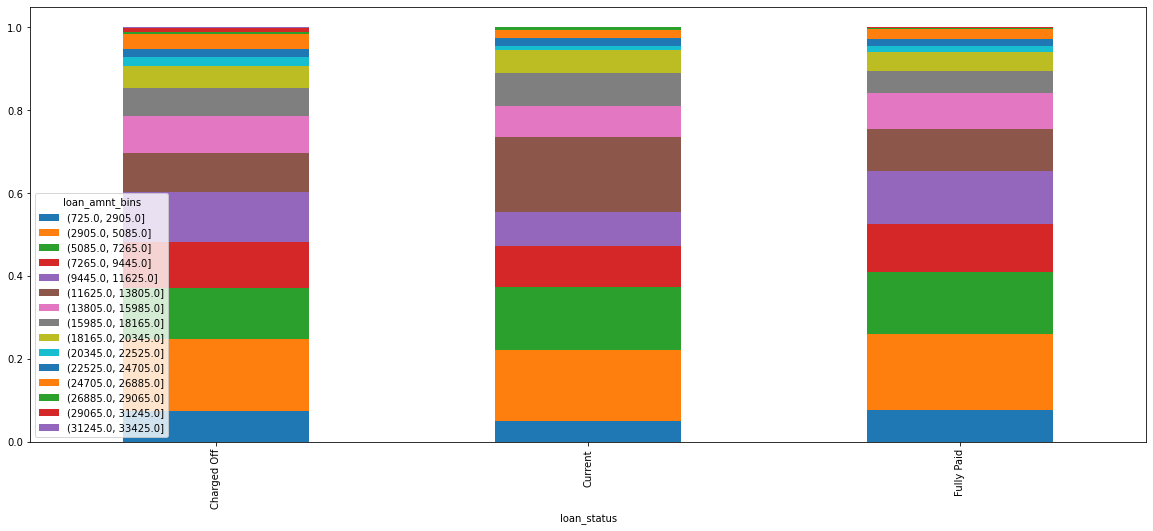

In [89]:
# Cross tabulation between Loan Status and loan_amnt_bins

pd.crosstab(index=loan_num_df['loan_status'],columns=loan_num_df['loan_amnt_bins'], normalize = "index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation
1. Similarly, even for loan amount, distribution is almost same for applicants who are charged_off and fully_paid. So we can conclude that loan amount alone doesn't have any significance effect on loan_status

<AxesSubplot:xlabel='loan_status'>

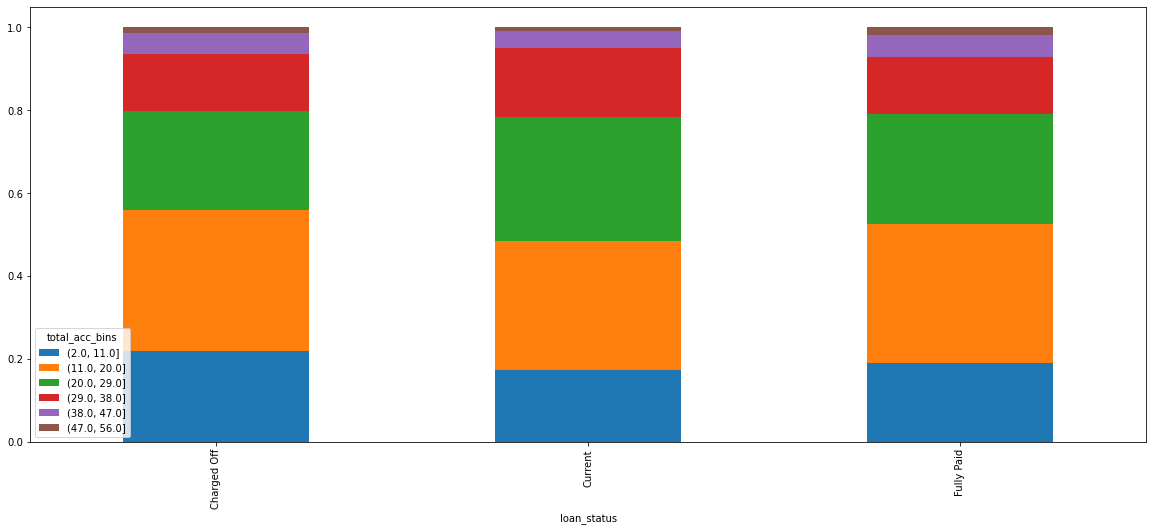

In [91]:
# Cross tabulation between Loan Status and total_acc_bins

pd.crosstab(index=loan_num_df['loan_status'],columns=loan_num_df['total_acc_bins'], normalize = "index").plot.bar(figsize=(20, 8), stacked = True)

#### Observation
1. Similarly, even for total accounts, distribution is almost same for applicants who are charged_off and fully_paid. So we can conclude that total accounts alone doesn't have any significance effect on loan_status

##### Lets do the bi varient anaylysis since more than concentration on what type of people taking loans, we need to do analysis on of these columns on loan_status

### Bivarient analysis

### Multivarient analysis

<AxesSubplot:>

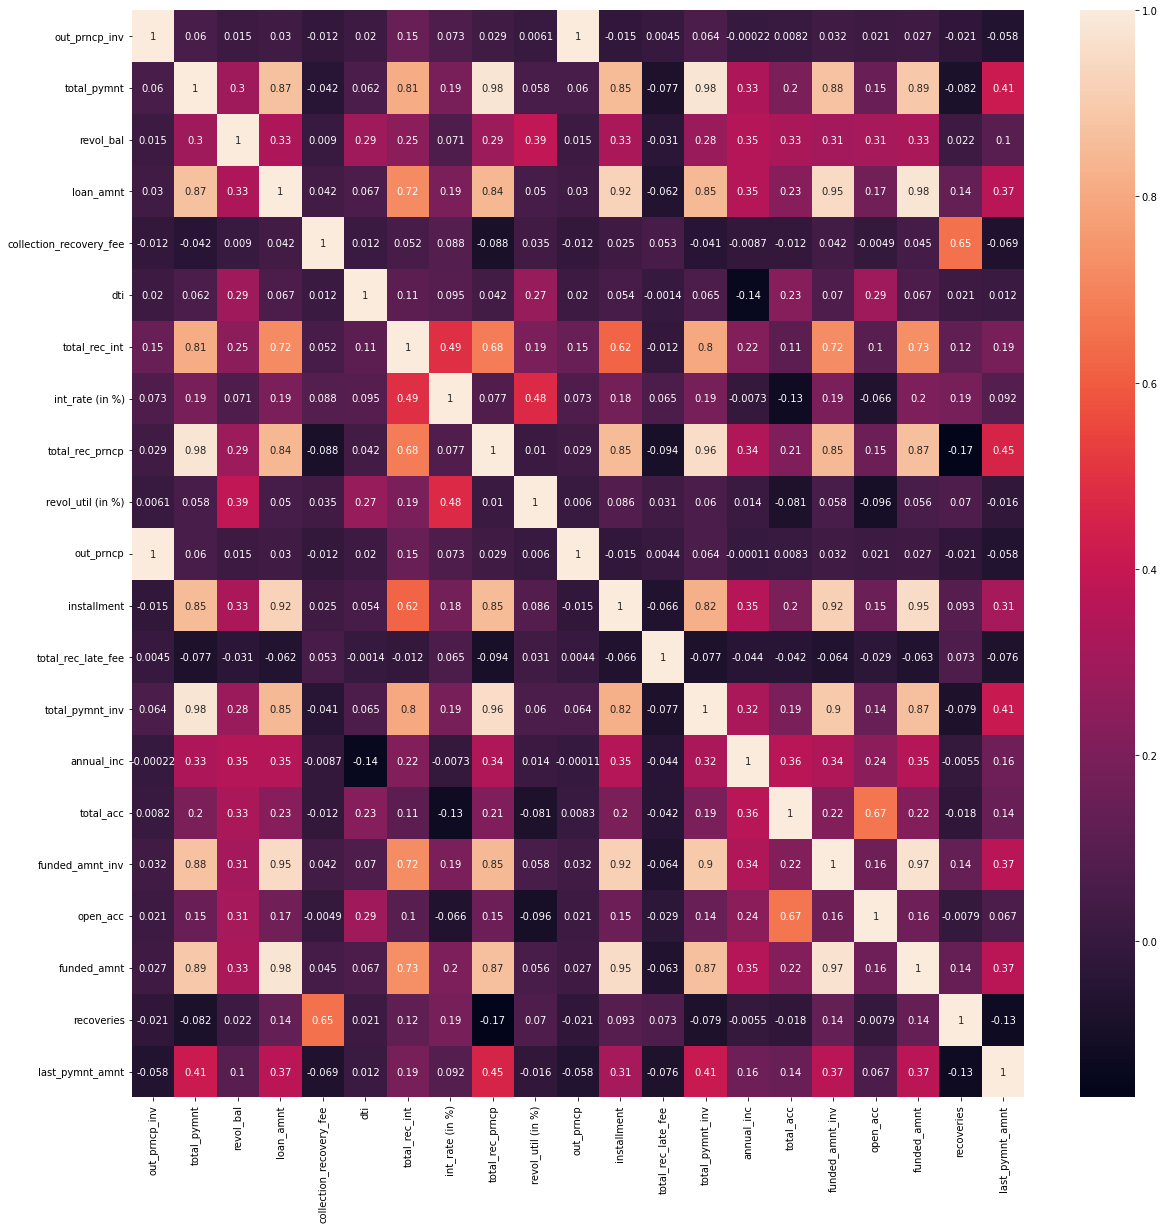

In [88]:
### Correlation matrix
plt.subplots(figsize=(20,20))
sb.heatmap(loan_num_df.corr(), annot=True)